<a href="https://colab.research.google.com/github/danielbauer1979/FI830/blob/main/FI830_YieldCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YIELD CURVE CODEBOOK

In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import pandas as pd 
import seaborn as sns
from IPython.display import HTML

# Get data

We clone the github repository so that we have the data (csv) files available.

In [2]:
!git clone https://github.com/danielbauer1979/FI830.git

Cloning into 'FI830'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [29]:
yields = pd.read_csv('FI830/FI830_YieldCurveData.csv')
print(yields.shape)
yields.head()

(7131, 9)


,date,DGS3MO,DGS1,DGS2,DGS5,DGS7,DGS10,DGS20,DGS30
0,1993-10-01,2.98,3.35,3.84,4.72,5.03,5.34,6.12,5.98
1,1993-10-04,3.02,3.35,3.85,4.71,5.04,5.34,6.10,5.99
2,1993-10-05,3.06,3.38,3.86,4.72,5.05,5.35,6.12,6.01
3,1993-10-06,3.04,3.36,3.85,4.70,5.05,5.35,6.12,6.01
4,1993-10-07,3.05,3.35,3.83,4.69,5.05,5.33,6.11,6.01


Let's do some visualizations

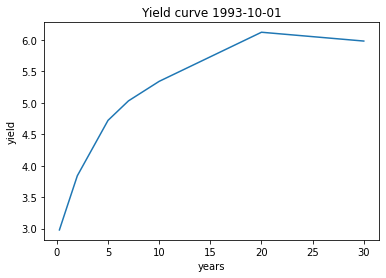

In [30]:
our_times = [0.25, 1, 2, 5, 7, 10, 20, 30]
plt.plot(our_times,yields.iloc[0,1:9])
plt.xlabel('years')
plt.ylabel('yield')
plt.title('Yield curve ' + yields.iloc[0,0])
plt.show()

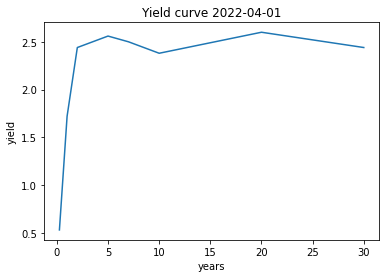

In [58]:
plt.plot(our_times,yields.iloc[7130,1:9])
plt.xlabel('years')
plt.ylabel('yield')
plt.title('Yield curve ' + yields.iloc[7130,0])
plt.show()

Let's have some fun. Let's do an animation that shows how the yield curve changes.

Startdate: 2005-10-14
Enddate: 2022-04-01


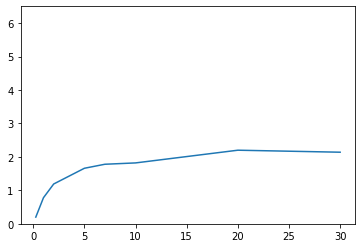

In [70]:
print('Startdate: ' + yields.iloc[3010,0])
print('Enddate: ' + yields.iloc[7130,0])
fig, ax = plt.subplots()
line, = ax.plot(our_times,yields.iloc[3010,1:9])
plt.ylim(0,6.5) 
def animate(i):
  line.set_ydata(yields.iloc[3010+i*40,1:9])  # update the data.
  return line,
ani = animation.FuncAnimation(
    fig, animate, interval=100, blit=True, save_count=103)
HTML(ani.to_html5_video())